In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
from mobilenetv2 import MobilenetV2

In [5]:
tf.__version__

'2.5.0'

## Fashion MNIST Dataset

In [6]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images = np.expand_dims(train_images, axis = 3)
test_images = np.expand_dims(test_images, axis = 3)

train_images = resize(train_images, (len(train_images),56,40,1))
test_images = resize(test_images, (len(test_images),56,40,1))

train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes=len(CLASS_NAMES))
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=len(CLASS_NAMES))

In [9]:
train_images.shape

(60000, 56, 40, 1)

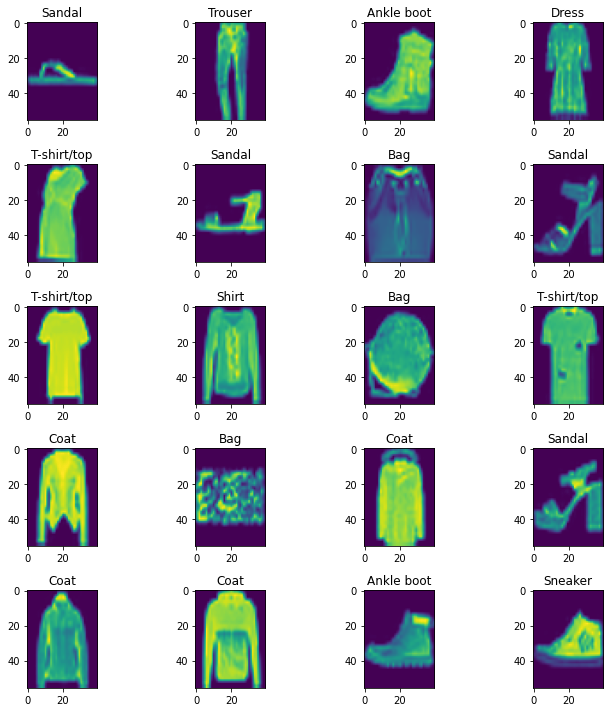

In [10]:
SAMPLE_SIZE = 20
samples = np.random.randint(0, len(train_images), size = SAMPLE_SIZE)

fig, axarr = plt.subplots(SAMPLE_SIZE//4,4, figsize = (10,10))
axs = axarr.ravel()

for idx, sample in enumerate(samples):
    axs[idx].imshow(train_images[sample,:,:])
    axs[idx].set_title(CLASS_NAMES[train_labels[sample]])
    
plt.tight_layout()

## Test MobilenetV2

In [27]:
# mobilenetv2 = MobilenetV2(len(CLASS_NAMES), train_images.shape[1:], alpha=0.75)
mobilenetv2 = MobilenetV2(len(CLASS_NAMES), input_shape = (56,40,1), alpha = 0.30)

In [28]:
input_layer, output_layer = mobilenetv2()
model = models.Model(inputs = input_layer, outputs = output_layer)

In [29]:
model.compile(optimizer='adam',
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

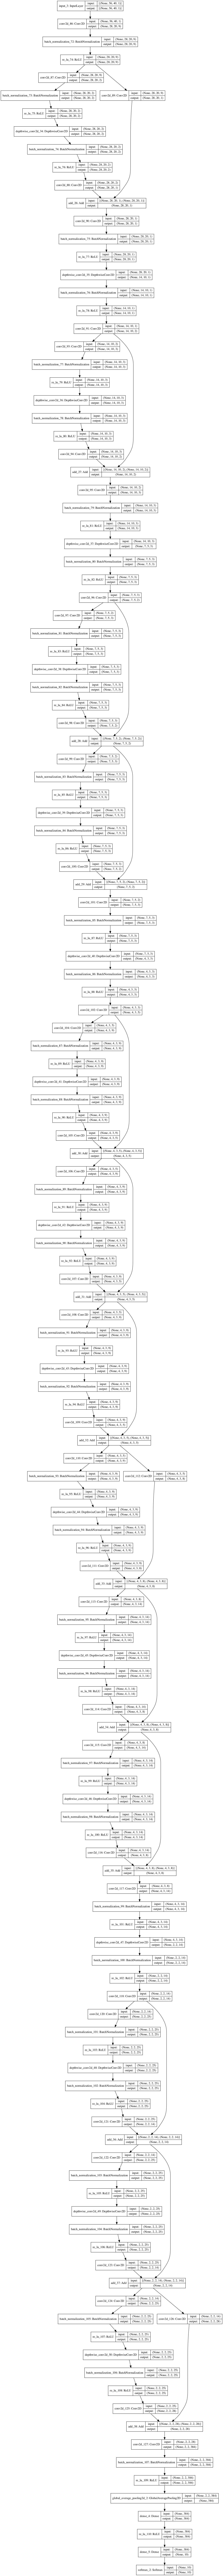

In [30]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [32]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 56, 40, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 28, 20, 9)    90          input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, 28, 20, 9)    36          conv2d_86[0][0]                  
__________________________________________________________________________________________________
re_lu_74 (ReLU)                 (None, 28, 20, 9)    0           batch_normalization_72[0][0]     
____________________________________________________________________________________________

In [33]:
model.save('mobilenetv2.h5')

/Users/mikheilcircadia/opt/anaconda3/envs/py37-tf250/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [34]:
model.fit(x = train_images, y = train_labels_onehot, validation_split=0.20, verbose=1,epochs = 2)

Epoch 1/2
1500/1500 [==============================] - 67s 42ms/step - loss: 1.1327 - accuracy: 0.5566 - val_loss: 0.7978 - val_accuracy: 0.6856
Epoch 2/2
1500/1500 [==============================] - 64s 43ms/step - loss: 0.7647 - accuracy: 0.6970 - val_loss: 0.6725 - val_accuracy: 0.7392


## Evaluate MobilenetV2

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.6973 - accuracy: 0.7293

Test accuracy: 0.7293000221252441
